In [0]:
#Install imageio package
!pip install imageio

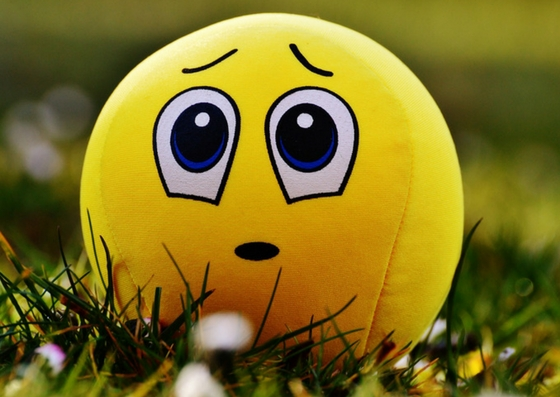

In [0]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

#Display the image from the web using an URI.
img="https://www.lovethisimages.com/wp-content/uploads/2018/04/sorry-images-download-1.jpg"
dp.Image(requests.get(img).content)

In [0]:
#Read the image using imgaeio package's imread method and URI from web using 
source_img = imageio.imread(img)

In [0]:
# Make the image Black and White using the formula Y= 0.299*R + 0.587*G + 0.114*B i.e. applying greyscale
import numpy as np

def grayscaleimg(rgb): 
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gryscl_img = grayscaleimg(source_img)


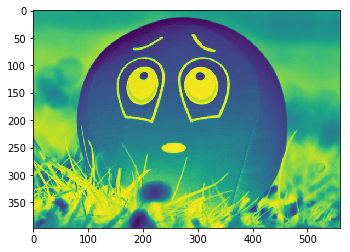

In [0]:
#Invert the image by subtracting it from 255
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

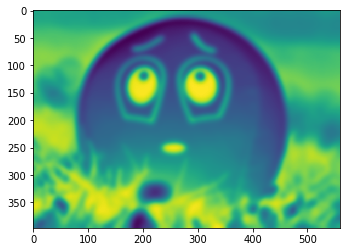

In [0]:
#Blur the image using gaussian filter
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [0]:
#Create function to perform dogding(belnding together greyscale and blurred image)
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img) 
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [0]:
#Generate the target image by applying the dodge
target_img= dodging(blurred_img, gryscl_img)

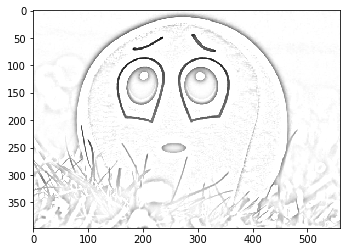

In [0]:
#Display the target image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")

In [0]:
#Save the image
plt.imsave('target_image.png', target_img, cmap='gray', vmin=0, vmax=255)